# Algorithms to approximate the solutions of non-linear equations

Nonlinear equations are mathematical expressions that involve variables raised to powers greater than one, multiplied together, or subjected to transcendental functions such as exponential or trigonometric functions.

These equations cannot be solved using algebraic manipulation because there is no formula or set of rules that can be applied to isolate the variable and find a unique solution.

In this notebook I'm exploring three algorithms that can be used to approximate a solution to a non-linear equation.
The equation used in the examples is:
$$e^x + x = 0$$

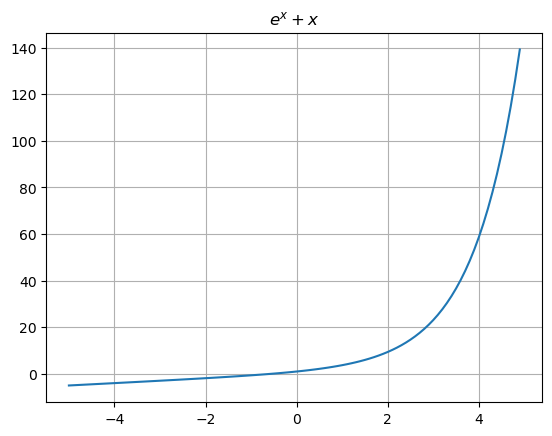

In [108]:
import math, numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

def f(x):
    return pow(Decimal(math.e),x ) + x

X=np.arange(Decimal(-5), Decimal(5), Decimal(0.1))
y= f(X)

plt.plot(X,y)
plt.title('$e^x + x$')
plt.grid(True)
plt.show()

## Bisection
The bisection method is an iterative algorithm that repeatedly bisects an interval and selects the subinterval where the function changes sign, reducing the interval size by half at each iteration, until the desired accuracy is achieved. It guarantees convergence to a root of a continuous function if the initial interval contains a root and the function is monotonic in that interval.

In [109]:
x0 = Decimal(-2) # First lower bound point, f(-2) is negative
x1 = Decimal(2) # First upper bound point, f(2) is positive
ERROR_TOLERANCE = 10**-28
error = Decimal("inf")
loops = 0

best_estimate_X = None
best_estimate_Y = None

while error > ERROR_TOLERANCE:
    best_estimate_X = x0 + (x1 - x0)/2
    best_estimate_Y = f(best_estimate_X)
    error = Decimal(abs(x0 - best_estimate_X))

    if best_estimate_Y < 0:
        x0 = best_estimate_X
    else:
        x1 = best_estimate_X

    loops += 1

print(f"""
Best estimate x: {best_estimate_X}
Loops: {loops}
Max error: {error}
""")



Best estimate x: -0.5671432904097838839154938042
Loops: 96
Max error: 0E-28



_____

## Secant
The secant method is an iterative algorithm that approximates the root of a nonlinear equation by drawing a secant line through two points on the function and finding the intersection of that line with the x-axis, replacing one of the points with this new estimate and repeating until the desired accuracy is achieved. It converges faster than the bisection method, but may fail to converge or converge to a wrong root if the function has a flat region or oscillates.


In [110]:
x0 = Decimal(-2) # First lower bound point, f(-2) is negative
x1 = Decimal(2) # First upper bound point, f(2) is positive

DIFFERENCE_TO_PREVIOUS_TOLERANCE = 10**-18
difference_to_previous = Decimal("inf")
loops = 0

while difference_to_previous > DIFFERENCE_TO_PREVIOUS_TOLERANCE:
    # Calculating the slope
    m = (f(x1) - f(x0))/(x1 - x0)

    x0 = x1

    # Finding the root of the secant and setting it to x1
    x1 = (m*x0 -f(x1))/m

    difference_to_previous = abs(f(x1)-f(x0))
    loops += 1

print(f"""
Best estimate x: {x1}
Loops: {loops}
Difference to previous  loop: {difference_to_previous}
""")


Best estimate x: -0.5671432904097838839154938041
Loops: 9
Difference to previous: 6.152667E-22



_____
## Tangent
The tangent method, also known as Newton's method, is an iterative algorithm that approximates the root of a nonlinear equation by using the slope of the tangent line at an initial estimate to find the intersection of the tangent with the x-axis, replacing the initial estimate with this new estimate and repeating until the desired accuracy is achieved. It converges faster than the secant method, but may fail to converge or converge to a wrong root if the initial estimate is too far from the true root or the function has a flat region or a singularity.

In [111]:
x0 = Decimal(-2) # Singular point, it's important to have an initial point that is not in a flat regions otherwise the algorithm will diverge.
previous = Decimal("inf")

DIFFERENCE_TO_PREVIOUS_TOLERANCE = 10**-18
difference_to_previous = Decimal("inf")
loops = 0

# Derivative of the function
def d(x):
    return pow(Decimal(math.e),x ) + 1

while difference_to_previous > DIFFERENCE_TO_PREVIOUS_TOLERANCE:
    m = d(x0)
    x0 = (m*x0 - f(x0))/m

    difference_to_previous = abs(f(x0)-previous)
    previous = f(x0)
    loops += 1

print(f"""
Best estimate x: {x1}
Loops: {loops}
Difference to previous loop: {difference_to_previous}
""")


Best estimate x: -0.5671432904097838839154938041
Loops: 6
Difference to previous: 2.576987E-22

